## Developer Differences among Countries

Discovering developer country difference using stackoverflow's 2018 developer survey dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_2018 = pd.read_csv('data/survey_results_public.csv', low_memory=False)
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


First, for this analysis, I'd like to choose a subset of countries that I'm interested in.  
There are two categories of these countries:  
* Top 10 countries where developers are most active in stackoverflow
* Countries that provides most job opportunies around my home country (Taiwan)

In [3]:
# Top 10 active countries
df_country_count = df_2018.groupby(['Country'])['Respondent'].count().sort_values(ascending=False)
df_country_count.head(10)

Country
United States         20309
India                 13721
Germany                6459
United Kingdom         6221
Canada                 3393
Russian Federation     2869
France                 2572
Brazil                 2505
Poland                 2122
Australia              2018
Name: Respondent, dtype: int64

The top 10 active countries are shown above. And the countries near my geographical position are:
* China
* Singapore
* Japan
* Hong Kong
* Taiwan
* South Korea  
How following is the country list for the analysis  

Take a look on how many entries in these countries:

In [4]:
df_country_count.loc[['Taiwan', 'China', 'Japan', 'Singapore', 'Hong Kong (S.A.R.)', 'South Korea']]

Country
Taiwan                 207
China                 1037
Japan                  361
Singapore              376
Hong Kong (S.A.R.)     219
South Korea            169
Name: Respondent, dtype: int64

In [5]:
# The counties list used in this analysis
countries_top10 = [
    # Top 10 active countries
    'United States',
    'India', 'Germany',
    'United Kingdom',
    'Canada',
    'Russian Federation',
    'France',
    'Brazil',
    'Australia',
    'Netherlands',
    'Spain',
]

countries_selected = [
    # Countries nearby
    'China',
    'Singapore',
    'Japan',
    'Hong Kong (S.A.R.)',
    'Taiwan',
    'South Korea'
]

Also, following are the attributes I am most interested in.

In [6]:
# Attributes list
target_attributes = [
    # Background
    'Country',
    'YearsCoding',
    'CompanySize',
    'DevType',    
    'YearsCodingProf',
    'JobSatisfaction',
    'CareerSatisfaction',
    'ConvertedSalary',
    # Technologies
    'CommunicationTools',
    'LanguageWorkedWith',
    'DatabaseWorkedWith',
    'DatabaseDesireNextYear',
    'PlatformWorkedWith',
    'FrameworkWorkedWith',
    'OperatingSystem',
    'Methodology',
]

Obtain the subset of original and save it to a csv for further analysis

In [7]:
# Subset
df_2018 = df_2018[df_2018.Country.isin(countries_top10+countries_selected)] # filter by countries
df_2018 = df_2018[target_attributes] # filter by attributes
df_2018.head()

,Country,YearsCoding,CompanySize,DevType,YearsCodingProf,JobSatisfaction,CareerSatisfaction,ConvertedSalary,CommunicationTools,LanguageWorkedWith,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Methodology
1,United Kingdom,30 or more years,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,70841.0,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Django,Linux-based,NaN
2,United States,24-26 years,20 to 99 employees,Engineering manager;Full-stack developer,6-8 years,Moderately satisfied,Moderately satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United States,18-20 years,100 to 499 employees,Full-stack developer,12-14 years,Neither satisfied nor dissatisfied,Slightly dissatisfied,NaN,NaN,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,NaN,Windows,Agile;Kanban;Scrum
5,United Kingdom,6-8 years,10 to 19 employees,Back-end developer;Database administrator;Fron...,3-5 years,Moderately satisfied,Slightly satisfied,41671.0,Confluence;Jira;Office / productivity suite (M...,Java;JavaScript;Python;TypeScript;HTML;CSS,MongoDB,PostgreSQL,Linux,Angular;Node.js,Linux-based,Agile
6,United States,9-11 years,"10,000 or more employees",Back-end developer;Front-end developer;Full-st...,0-2 years,Slightly satisfied,Moderately satisfied,120000.0,Confluence;Office / productivity suite (Micros...,JavaScript;HTML;CSS,MongoDB,NaN,Linux,Node.js;React,MacOS,Agile;Scrum


In [8]:
# Save as csv
df_2018.to_csv('data/survey_modified.csv', index=False)

In [9]:
# Delete all the variables
del df_2018
del df_country_count
del countries_top10
del countries_selected
del target_attributes

Read the modified csv back for analysis

In [10]:
df = pd.read_csv('data/survey_modified.csv', low_memory=False)
df.head()

,Country,YearsCoding,CompanySize,DevType,YearsCodingProf,JobSatisfaction,CareerSatisfaction,ConvertedSalary,CommunicationTools,LanguageWorkedWith,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,FrameworkWorkedWith,OperatingSystem,Methodology
0,United Kingdom,30 or more years,"10,000 or more employees",Database administrator;DevOps specialist;Full-...,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,70841.0,Confluence;Office / productivity suite (Micros...,JavaScript;Python;Bash/Shell,Redis;PostgreSQL;Memcached,PostgreSQL,Linux,Django,Linux-based,NaN
1,United States,24-26 years,20 to 99 employees,Engineering manager;Full-stack developer,6-8 years,Moderately satisfied,Moderately satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,United States,18-20 years,100 to 499 employees,Full-stack developer,12-14 years,Neither satisfied nor dissatisfied,Slightly dissatisfied,NaN,NaN,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",Azure,NaN,Windows,Agile;Kanban;Scrum
3,United Kingdom,6-8 years,10 to 19 employees,Back-end developer;Database administrator;Fron...,3-5 years,Moderately satisfied,Slightly satisfied,41671.0,Confluence;Jira;Office / productivity suite (M...,Java;JavaScript;Python;TypeScript;HTML;CSS,MongoDB,PostgreSQL,Linux,Angular;Node.js,Linux-based,Agile
4,United States,9-11 years,"10,000 or more employees",Back-end developer;Front-end developer;Full-st...,0-2 years,Slightly satisfied,Moderately satisfied,120000.0,Confluence;Office / productivity suite (Micros...,JavaScript;HTML;CSS,MongoDB,NaN,Linux,Node.js;React,MacOS,Agile;Scrum


### Q1. What is the relative popularity of different programming languages/technologies in each country.

First, let's take a look on how many languages/frameworks/platforms/databases on average are used in each country.

In [11]:
# A function that extracts number of technologies used
def extractNumberOfTechnologiesAndPlot(df_origin, tech, color, center='mean'):
    """
        df: dataframe
        tech: Language, Database, Platform, or Framework
        color: color of the plot
        center: mean or median
    """
    df = df_origin.copy()
    NumOf = 'NumberOf' + tech
    WorkedWith = tech + 'WorkedWith'
    df[NumOf] = df[WorkedWith].str.split(';').apply(lambda x: len(x) if type(x)==list else 0)
    print(df[[NumOf, WorkedWith]].head())
    if center == 'mean':
        df.groupby(['Country'])[NumOf].mean().sort_values().plot.barh(color=color)
    else:
        df.groupby(['Country'])[NumOf].median().sort_values().plot.barh(color=color)
    plt.title('Number of ' + tech + ' Worked With');

   NumberOfLanguage                                LanguageWorkedWith
0                 3                      JavaScript;Python;Bash/Shell
1                 0                                               NaN
2                 7  C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell
3                 6        Java;JavaScript;Python;TypeScript;HTML;CSS
4                 3                               JavaScript;HTML;CSS


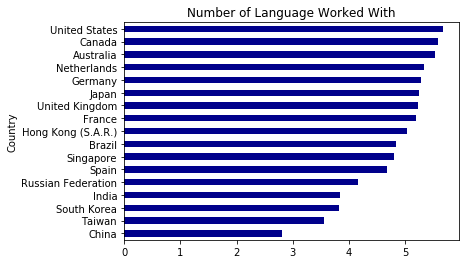

In [12]:
# Calculate the number of tech and plot: lang
extractNumberOfTechnologiesAndPlot(df, 'Language', 'darkblue')

   NumberOfDatabase                                 DatabaseWorkedWith
0                 3                         Redis;PostgreSQL;Memcached
1                 0                                                NaN
2                 2  SQL Server;Microsoft Azure (Tables, CosmosDB, ...
3                 1                                            MongoDB
4                 1                                            MongoDB


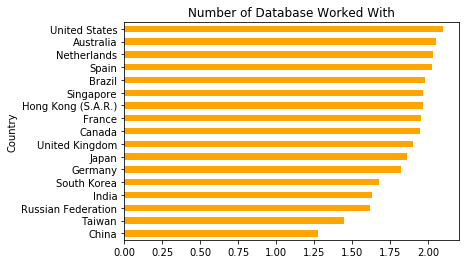

In [13]:
# Calculate the number of tech and plot: db
extractNumberOfTechnologiesAndPlot(df, 'Database', 'orange')

   NumberOfFramework FrameworkWorkedWith
0                  1              Django
1                  0                 NaN
2                  0                 NaN
3                  2     Angular;Node.js
4                  2       Node.js;React


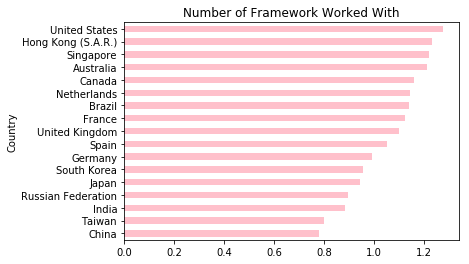

In [14]:
# Calculate the number of tech and plot: Framework
extractNumberOfTechnologiesAndPlot(df, 'Framework', 'pink')

   NumberOfPlatform PlatformWorkedWith
0                 1              Linux
1                 0                NaN
2                 1              Azure
3                 1              Linux
4                 1              Linux


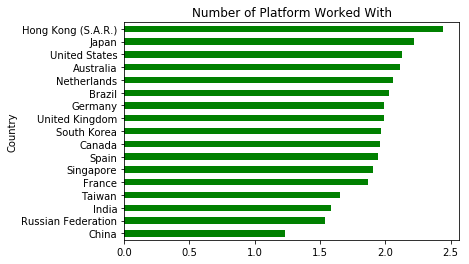

In [15]:
# Calculate the number of tech and plot: Platform
extractNumberOfTechnologiesAndPlot(df, 'Platform', 'green')

In [16]:
# Count the technology usage in each country, return a nested dictionary 
# in the form: {countyname: {tech1: count1, tech2: count2, ....}, .......}
def getStatistics(df, tech):
    """
        df: dataframe
        tech: Language, Database, Platform, or Framework
    """
    statistics = {}
    WorkedWith = tech + 'WorkedWith'
    for index, row in df[['Country', WorkedWith]].iterrows():
        # add countries to the list if not exists
        if row['Country'] not in statistics:
            statistics[row['Country']] = {}
        # Technology count
        if row[WorkedWith] is not np.nan:
            for tar in row[WorkedWith].split(';'):
                statistics[row['Country']][tar] = statistics[row['Country']].get(tar, 0) + 1 

    return statistics

In [17]:
# Counting the tech usage
language_statistics = getStatistics(df, 'Language')
platform_statistics = getStatistics(df, 'Platform')
database_statistics = getStatistics(df, 'Database')
framework_statistics = getStatistics(df, 'Framework')

In [18]:
# Return a dataframe of relative usage of technologies among the selected countries
def dfWithRelativePreference(statistics, countries):
    """
        statistics: statistic object calculated by getStatistics function
        countries: countries to be display and visualized
    """
    df = pd.DataFrame(statistics)
    df['total_along_row']  = df.sum(axis=1)
    df = (df/df.sum()*100).fillna(0) # normalize and fill NaN
    df = df[countries+['total_along_row']]
    for country in countries:
        df[country] = df[country] - df['total_along_row']
    return df.drop(['total_along_row'], axis=1)

In [19]:
# Due to width limitation of the notebook, here I only compare a few countries
analysis_countries = ['China',
    'Singapore',
    'Japan',
    'Hong Kong (S.A.R.)',
    'Taiwan',
    'South Korea',
    'United States']

In [20]:
df_lang = dfWithRelativePreference(language_statistics, analysis_countries)
df_lang.style.bar(align='mid', color=['#d65f5f', '#5fba7d'])

,China,Singapore,Japan,Hong Kong (S.A.R.),Taiwan,South Korea,United States
Assembly,-0.19981,-0.0734745,-0.125636,-0.490904,-0.17818,0.418905,-0.125788
Bash/Shell,-0.636197,-0.496104,0.40273,-0.457538,-0.311329,-2.02405,1.05045
C,2.0356,-0.682866,0.58869,-1.46098,0.604396,3.22353,-0.775777
C#,-0.839762,-0.147304,-0.929491,-0.21623,0.25304,-2.21132,0.23367
C++,1.54697,-0.244905,0.516779,-0.472072,1.13475,2.01351,-0.49467
CSS,-1.7978,-0.249115,-0.965005,0.178031,-0.557073,-1.63878,-0.0588927
Clojure,-0.0922122,0.0476342,0.0339075,-0.229528,-0.0940264,-0.229528,0.0731714
Cobol,0.0902985,0.0506224,0.0950735,-0.0248482,0.0198267,0.193444,-0.0185334
CoffeeScript,-0.120257,-0.123074,0.118399,0.160079,0.381977,-0.411973,0.143813
Delphi/Object Pascal,-0.192403,-0.163421,-0.0662832,0.0335877,-0.194217,0.28852,-0.174466


In [21]:
df_plat = dfWithRelativePreference(platform_statistics, analysis_countries)
df_plat.style.bar(align='mid', color=['#feff9f', '#0078ff'])

,China,Singapore,Japan,Hong Kong (S.A.R.),Taiwan,South Korea,United States
AWS,-4.29308,0.824328,1.85074,0.348423,-2.37412,0.538707,1.76019
Amazon Echo,-0.717819,-0.8457,-0.765941,-0.890863,-0.0985135,-0.664094,0.614032
Android,1.88197,1.72703,-1.21673,1.02114,2.79874,3.46676,-2.39111
Apple Watch or Apple TV,-0.386514,-0.000689784,-0.0755724,-0.138266,-0.407469,-0.398714,0.137516
Arduino,-1.79445,0.0399634,-0.474115,-0.226836,-0.967415,1.81408,-0.120415
Azure,-1.76834,-0.246427,-0.635817,-0.513226,-1.25381,-2.07591,0.425103
Drupal,-0.390385,-0.456725,-0.766008,-0.0808052,-0.140749,-1.01538,0.00832477
ESP8266,-0.259455,-0.0298811,0.0199245,0.0194584,-0.728205,0.172696,-0.0534351
Firebase,-3.04496,1.66087,0.223823,2.15218,0.484105,3.0441,-1.19575
Gaming console,-0.158506,-0.471006,0.152435,-0.0971741,-0.471006,0.129595,0.0835996


In [22]:
df_frame = dfWithRelativePreference(framework_statistics, analysis_countries)
df_frame.style.bar(align='mid', color=['#bdc3c7', '#9b59b6'])

,China,Singapore,Japan,Hong Kong (S.A.R.),Taiwan,South Korea,United States
.NET Core,-4.67345,-2.60211,-2.57783,-4.69362,1.61607,-6.66892,0.861511
Angular,-8.96572,-0.388095,-6.23786,-3.67785,-2.32132,-9.35687,-0.695624
Cordova,-1.63746,0.180147,-1.10213,2.1845,1.07786,0.579566,-1.30597
Django,2.41337,0.0680828,-0.0916422,-1.80556,3.38855,1.15741,-0.0881503
Hadoop,3.15267,2.03476,0.392148,0.0521897,-0.733174,1.1633,0.0761674
Node.js,-3.78514,-2.23123,0.179977,4.43544,0.245342,2.08976,0.968512
React,-4.06292,0.197306,1.87186,1.22127,-4.92777,-2.23552,1.74321
Spark,2.27664,1.80721,-0.204047,0.783245,-1.34527,0.536331,0.201357
Spring,8.98402,1.80284,2.63149,-1.92265,-2.19485,10.2996,-1.88369
TensorFlow,5.35735,0.526569,4.74906,1.50696,3.78273,3.35881,0.178766


In [23]:
df_db = dfWithRelativePreference(database_statistics, analysis_countries)
df_db.style.bar(align='mid', color=['#f1c40f', '#16a085'])

,China,Singapore,Japan,Hong Kong (S.A.R.),Taiwan,South Korea,United States
Amazon DynamoDB,-1.40733,-0.407572,0.0711405,-0.30818,-1.49766,-0.397545,0.827575
Amazon RDS/Aurora,-1.52032,-0.504302,0.705671,1.12234,-0.79259,1.05429,0.750998
Amazon Redshift,-0.498743,-0.142134,-0.35682,-0.952945,-0.619612,0.107126,0.5653
Apache HBase,1.66051,0.740859,0.134664,0.0855629,-0.277159,0.449578,0.0395131
Apache Hive,1.33598,1.1677,0.0348572,-0.163275,-0.525997,0.554097,0.135624
Cassandra,-0.531505,0.797955,-0.0229257,-0.436133,-0.364207,-1.36421,0.231475
Elasticsearch,-0.947976,0.353352,-0.120124,-2.17095,-0.520522,-2.00698,0.28037
Google BigQuery,-0.466116,-0.228376,0.721396,0.623194,-0.10225,-0.41556,0.230731
Google Cloud Storage,-1.04869,1.42128,0.874497,1.52318,0.0429025,0.163044,0.0703576
IBM Db2,-0.000535433,0.307278,-0.0147504,0.251155,-0.575605,-0.555581,0.104789


In [24]:
del language_statistics
del platform_statistics
del database_statistics
del framework_statistics
del analysis_countries
del df_lang
del df_plat
del df_frame
del df_db

### Q2. What are the converted salary in each country along with the cost of living ?
Next, I want to examine the median salary of selected countries and their costs of living. 

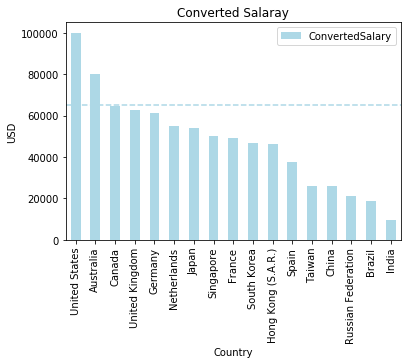

In [25]:
# Drop the records without salary
df = df.dropna(subset=['ConvertedSalary'])
df_country_salary = df.groupby(['Country'])['ConvertedSalary'].median().reset_index('Country').sort_values(by='ConvertedSalary', ascending=False)
df_country_salary = df_country_salary.reset_index().drop(['index'], axis=1)
# Plot the median salary of each country and the median salary among all the selected countries
df_country_salary.plot.bar(x='Country', y='ConvertedSalary', color="lightblue")
avg_salary = df['ConvertedSalary'].median()
plt.axhline(y=avg_salary, color='lightblue', linestyle='--')
plt.title('Converted Salaray')
plt.ylabel('USD');

In [26]:
# Cost of Living Index by Contries 2019
# https://www.numbeo.com/cost-of-living/rankings_by_country.jsp
df_cost = pd.DataFrame({'CostOfLivingAndRent': 
                        [
                            55.06, # US
                            54.52, # Australia
                            47.39, # Canada
                            47.66, # UK
                            48.04, # Germany
                            55.58, # Netherland
                            56.75, # Japan
                            61.77, # Singapore
                            51.51, # France
                            50.66, # South Korea
                            77.51, # Hong Kong
                            38.39, # Spain
                            42.33, # Taiwan
                            28.73, # China
                            24.55, # Russia
                            27.75, # Brazil
                            15.37 # India
                        ]})
df_country_salary_and_cost = df_country_salary.join(df_cost)
df_country_salary_and_cost.head()

,Country,ConvertedSalary,CostOfLivingAndRent
0,United States,100000.0,55.06
1,Australia,79973.0,54.52
2,Canada,64417.0,47.39
3,United Kingdom,62507.0,47.66
4,Germany,61194.0,48.04


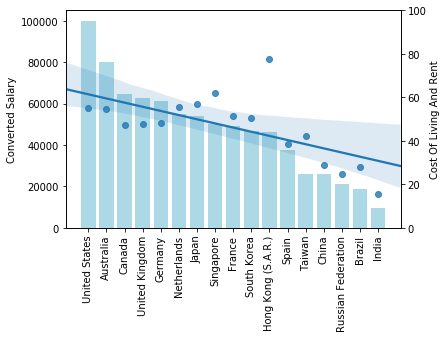

In [27]:
# Add cost of living to the visualization
import seaborn as sns
fig, ax1 = plt.subplots()
x_pos = np.arange(len(df_country_salary_and_cost['Country']))
ax1.bar(x_pos, df_country_salary_and_cost['ConvertedSalary'], color='lightblue')
ax1.set_ylabel('Converted Salary')
plt.xticks(x_pos, df_country_salary_and_cost['Country'], rotation='vertical');

ax2 = ax1.twinx()
sns.regplot(x_pos, df_country_salary_and_cost['CostOfLivingAndRent'].values, ax=ax2)
ax2.set_ylabel('Cost Of Living And Rent')
ax2.set_ylim((0,100));

In [28]:
del df_country_salary
del df_cost
del df_country_salary_and_cost

### Q3. What are the factors for job satisfaction ?
Finally, let's see what factors contribute to each country's job satisfaction.  

In [29]:
# Job Satisfaction Answer
df['JobSatisfaction'].unique()

array(['Moderately dissatisfied', 'Moderately satisfied',
       'Slightly satisfied', 'Neither satisfied nor dissatisfied',
       'Slightly dissatisfied', 'Extremely dissatisfied', nan,
       'Extremely satisfied'], dtype=object)

For easy visualization and comparsion of the satisfaction, I assume the level of satisfaction can be modeled as numberical values, with successive level of satisfaction differed by 1

In [30]:
# Map satisfaction level to numberic form
satisfaction_to_val = {
    'Extremely dissatisfied': 1,
    'Moderately dissatisfied': 2,
    'Slightly dissatisfied': 3,
    'Neither satisfied nor dissatisfied': 4,
    'Slightly satisfied': 5,
    'Moderately satisfied': 6,
    'Extremely satisfied': 7
}

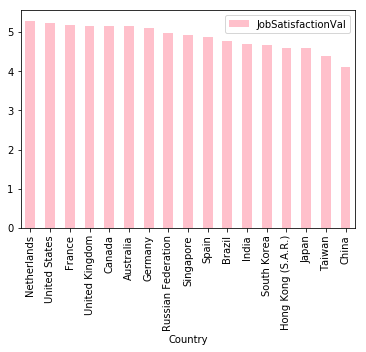

In [31]:
# Dropna and convert to numerical form
df = df.dropna(subset=['JobSatisfaction'])
df['JobSatisfactionVal']=df['JobSatisfaction'].map(satisfaction_to_val) 
df_country_job_satis = df.groupby(['Country'])['JobSatisfactionVal'].mean().reset_index('Country').sort_values(by='JobSatisfactionVal', ascending=False)
df_country_job_satis.plot.bar(x='Country', y='JobSatisfactionVal', color="pink")

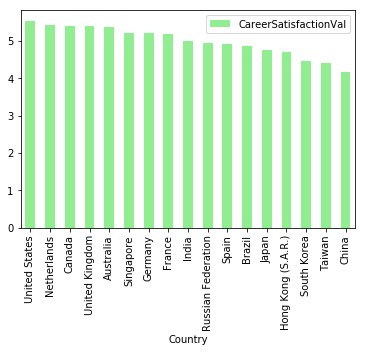

In [32]:
# Apply to career satisfaction 
df = df.dropna(subset=['CareerSatisfaction'])
df['CareerSatisfactionVal']=df['CareerSatisfaction'].map(satisfaction_to_val) 
df_country_career_satis = df.groupby(['Country'])['CareerSatisfactionVal'].mean().reset_index('Country').sort_values(by='CareerSatisfactionVal', ascending=False)
df_country_career_satis.plot.bar(x='Country', y='CareerSatisfactionVal', color="lightgreen")

In [33]:
del df_country_job_satis
del df_country_career_satis

The above results show that salary might correlate with job satisfaction.
Next, I want to assess what factors do contribute to the Job satisfaction.  

In the following analysis, I'll use `feature_selector` package to find the most important features for the job satisfaction. This library use gradient boosting tree to fit the data and find relatively important features for us.
The [source code](https://github.com/WillKoehrsen/feature-selector) and the [blog post](https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0) can be found here. 

For ease of analysis, I want to replace categorical values in `YearsCoding` and `YearsCodingProf` column with numerical values

In [35]:
df= df.dropna(subset=['YearsCoding', 'YearsCodingProf'])

year_to_num = {
    '18-20 years': 19,
    '3-5 years': 4,
    '0-2 years': 1,
    '21-23 years': 22,
    '12-14 years': 13,
    '6-8 years': 7,
    '9-11 years': 10,
    '15-17 years':16,
    '30 or more years': 35,
    '24-26 years':25,
    '27-29 years':28
}

df['NumYearsCoding'] = df['YearsCoding'].map(year_to_num)
df['NumYearsCodingProf'] = df['YearsCodingProf'].map(year_to_num)
df = df.drop(['YearsCoding', 'YearsCodingProf'], axis=1)

In [38]:
# Import and initiation of FeatureSelector
from feature_selector import FeatureSelector
fs = FeatureSelector(
    data=df.drop(['CareerSatisfaction', 'CareerSatisfactionVal', 'JobSatisfaction', 'JobSatisfactionVal'], axis=1),
    labels=df['JobSatisfactionVal'])

In [40]:
# Assess missing values 
fs.identify_missing(missing_threshold = 0.6)

0 features with greater than 0.60 missing values.



In [41]:
# Assess Collinearity
fs.identify_collinear(correlation_threshold = 0.98)

0 features with a correlation magnitude greater than 0.98.



In [42]:
# Identify zero-importance features
fs.identify_zero_importance(task = 'regression', 
                            eval_metric = 'l2', 
                            n_iterations = 3, 
                            early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[85]	valid_0's l2: 2.89475	valid_0's l2: 2.89475
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[93]	valid_0's l2: 2.86947	valid_0's l2: 2.86947
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[45]	valid_0's l2: 3.00713	valid_0's l2: 3.00713

34272 features with zero importance after one-hot encoding.



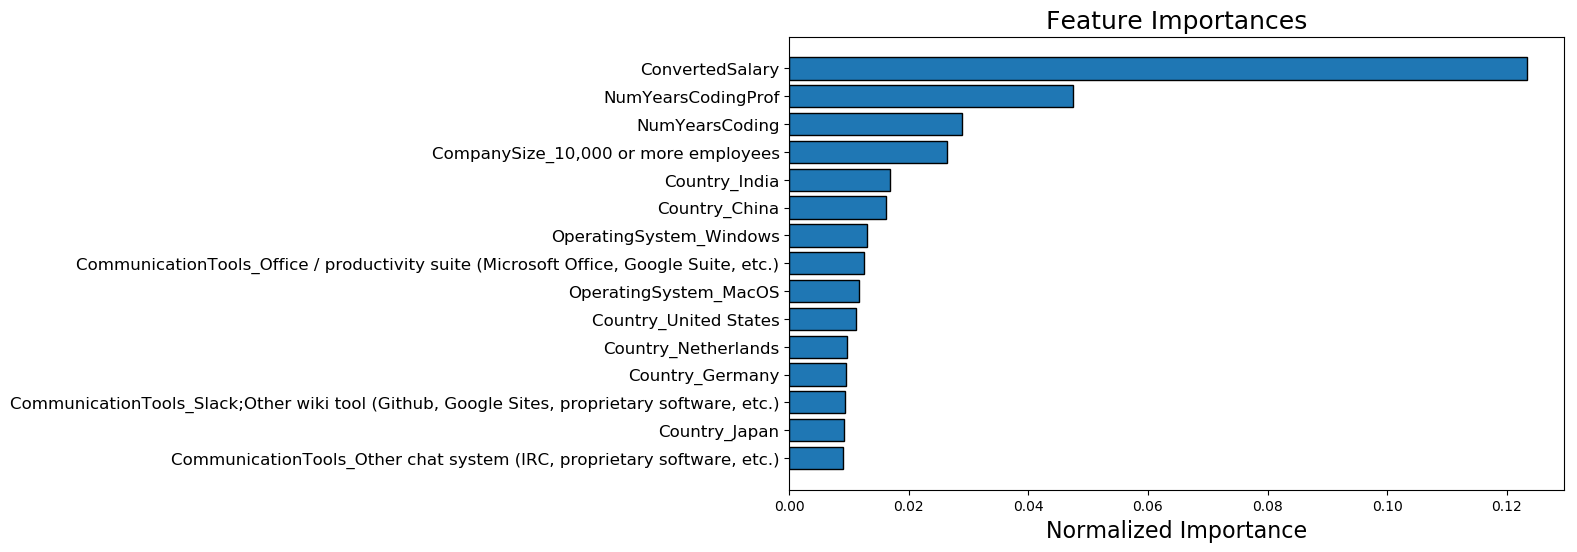

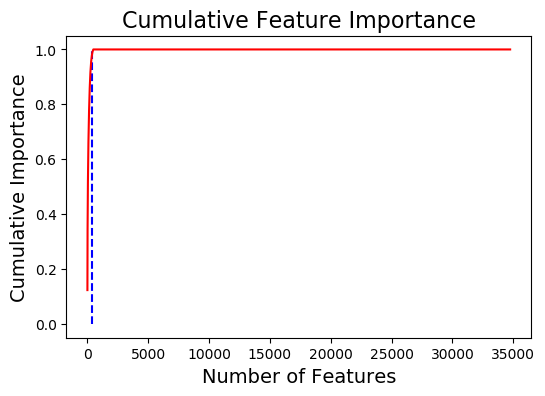

411 features required for 0.99 of cumulative importance


In [43]:
# Plot the feature importances
fs.plot_feature_importances(threshold = 0.99, plot_n = 15)

In [44]:
fs.feature_importances.head(15)

,feature,importance,normalized_importance,cumulative_importance
0,ConvertedSalary,275.333333,0.123468,0.123468
1,NumYearsCodingProf,106.000000,0.047534,0.171001
2,NumYearsCoding,64.333333,0.028849,0.199851
3,"CompanySize_10,000 or more employees",58.666667,0.026308,0.226158
4,Country_India,37.666667,0.016891,0.243049
5,Country_China,36.000000,0.016143,0.259193
6,OperatingSystem_Windows,29.000000,0.013004,0.272197
7,CommunicationTools_Office / productivity suite...,28.000000,0.012556,0.284753
8,OperatingSystem_MacOS,26.000000,0.011659,0.296413
9,Country_United States,25.000000,0.011211,0.307623
